单色

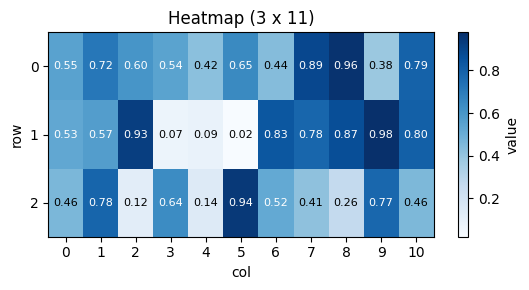

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
rows, cols = 3, 11
mat = np.random.rand(rows, cols)

plt.figure(figsize=(max(4, cols*0.5), max(3, rows*0.5)))
ax = plt.gca()

# origin='upper' 保证行0 在上方；若需行0在下方改为 'lower'
im = ax.imshow(mat, cmap='Blues', aspect='auto', interpolation='nearest', origin='upper')
cbar = plt.colorbar(im, label='value')

# 将刻度设置在每个格子中心，保证文本对齐
ax.set_xticks(np.arange(cols))
ax.set_yticks(np.arange(rows))
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(rows - 0.5, -0.5)  # 与 origin='upper' 对应；若 origin='lower' 改为 (-0.5, rows-0.5)

# 在每个格子上标注数值（水平/垂直居中）
for i in range(rows):
    for j in range(cols):
        ax.text(j, i, f"{mat[i, j]:.2f}",
                ha='center', va='center',
                color='black' if mat[i, j] < 0.5 else 'white',
                fontsize=8)

plt.title(f"Heatmap ({rows} x {cols})")
plt.xlabel('col')
plt.ylabel('row')
plt.tight_layout()
plt.show()

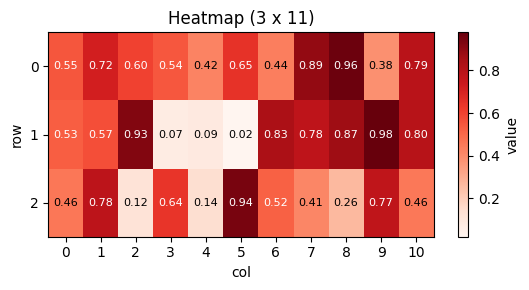

In [16]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
rows, cols = 3, 11
mat = np.random.rand(rows, cols)

plt.figure(figsize=(max(4, cols*0.5), max(3, rows*0.5)))
ax = plt.gca()

# origin='upper' 保证行0 在上方；若需行0在下方改为 'lower'
im = ax.imshow(mat, cmap='Reds', aspect='auto', interpolation='nearest', origin='upper')
cbar = plt.colorbar(im, label='value')

# 将刻度设置在每个格子中心，保证文本对齐
ax.set_xticks(np.arange(cols))
ax.set_yticks(np.arange(rows))
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(rows - 0.5, -0.5)  # 与 origin='upper' 对应；若 origin='lower' 改为 (-0.5, rows-0.5)

# 在每个格子上标注数值（水平/垂直居中）
for i in range(rows):
    for j in range(cols):
        ax.text(j, i, f"{mat[i, j]:.2f}",
                ha='center', va='center',
                color='black' if mat[i, j] < 0.5 else 'white',
                fontsize=8)

plt.title(f"Heatmap ({rows} x {cols})")
plt.xlabel('col')
plt.ylabel('row')
plt.tight_layout()
plt.show()

双色

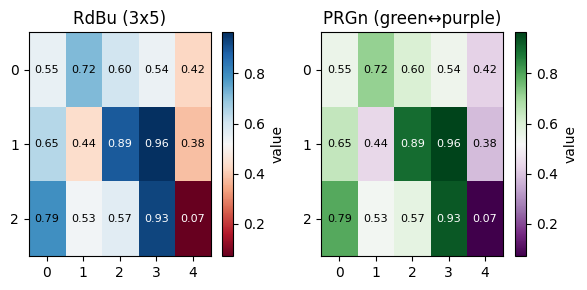

In [28]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
rows, cols = 3, 5
mat = np.random.rand(rows, cols)

fig, axs = plt.subplots(1, 2, figsize=(max(6, cols*0.5), max(3, rows*0.5)))

# 红-蓝 (diverging)
im0 = axs[0].imshow(mat, cmap='RdBu', origin='upper', aspect='auto')
fig.colorbar(im0, ax=axs[0], label='value')
axs[0].set_title(f'RdBu ({rows}x{cols})')

# 绿-紫 (diverging)
im1 = axs[1].imshow(mat, cmap='PRGn', origin='upper', aspect='auto')
fig.colorbar(im1, ax=axs[1], label='value')
axs[1].set_title('PRGn (green↔purple)')

for ax in axs:
    ax.set_xticks(np.arange(cols)); ax.set_yticks(np.arange(rows))
    ax.set_xlim(-0.5, cols - 0.5); ax.set_ylim(rows - 0.5, -0.5)

    # 在每个格子上标注数值（水平/垂直居中）
    import matplotlib.colors as mcolors

    cmap = plt.get_cmap('rainbow')          # 或 'RdBu','PRGn' 等，和 im 使用同一 cmap
    norm = mcolors.Normalize(vmin=mat.min(), vmax=mat.max())

    for i in range(rows):
        for j in range(cols):
            r, g, b, _ = cmap(norm(mat[i, j]))          # 获取 sRGB
            # 简单感知亮度（可选：线性化再计算更精确）
            lum = 0.299 * r + 0.587 * g + 0.114 * b
            color = 'black' if lum > 0.5 else 'white'
            ax.text(j, i, f"{mat[i, j]:.2f}", ha='center', va='center', color=color, fontsize=8)
        
plt.tight_layout()
plt.show()